In [40]:
from sources.rsa import *
from sources.paillier import *
from sources.ckks import *

import matplotlib.pyplot as plt
import time

!pip install tenseal
!pip install numpy
!pip install matplotlib

In [ ]:
def test_performance():
    values = [2**i for i in range(0, 40)]

    results = {
        "value": [],
        "ckks_time": [],
        "paillier_time": [],
        "rsa_time": [],
        "ckks_add_error": [],
        "ckks_mul_error": []
    }

    ckks_ctx = ckks_context()
    paillier_keys = paillier_generate_keys(61, 53)
    rsa_keys = rsa_generate_keys(61, 53)

    for val in values:
        results["value"].append(val)

        start = time.time()
        ckks_cipher = ckks_encrypt(ckks_ctx, [val])
        ckks_enc_time = (time.time() - start) * 1000

        ckks_add = ckks_cipher + ckks_cipher
        ckks_mul = ckks_cipher * ckks_cipher

        ckks_add_dec = ckks_add.decrypt()[0]
        ckks_mul_dec = ckks_mul.decrypt()[0]

        ckks_add_error = abs((val + val) - ckks_add_dec)
        ckks_mul_error = abs((val * val) - ckks_mul_dec)

        start = time.time()
        paillier_cipher = paillier_encrypt(val, paillier_keys['public'], paillier_keys['nsquare'])
        paillier_enc_time = (time.time() - start) * 1000
        paillier_decrypted = paillier_decrypt(paillier_cipher, paillier_keys['private'], paillier_keys['public'], paillier_keys['nsquare'])

        start = time.time()
        rsa_cipher = rsa_encrypt(val, rsa_keys['public'])
        rsa_enc_time = (time.time() - start) * 1000
        rsa_decrypted = rsa_decrypt(rsa_cipher, rsa_keys['private'])

        results["ckks_time"].append(ckks_enc_time)
        results["paillier_time"].append(paillier_enc_time)
        results["rsa_time"].append(rsa_enc_time)
        results["ckks_add_error"].append(ckks_add_error)
        results["ckks_mul_error"].append(ckks_mul_error)

    return results


In [ ]:
def plot_results(results):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(results["value"], results["ckks_time"], label="CKKS")
    plt.plot(results["value"], results["paillier_time"], label="Paillier")
    plt.plot(results["value"], results["rsa_time"], label="RSA")
    plt.xlabel("Valor de entrada")
    plt.ylabel("Tempo de encriptação (ms)")
    plt.title("Tempo de encriptação por algoritmo")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(results["value"], results["ckks_add_error"], label="Erro CKKS - Adição", color="blue", marker='o')
    plt.plot(results["value"], results["ckks_mul_error"], label="Erro CKKS - Multiplicação", color="red", marker='s')
    plt.xlabel("Valor de entrada")
    plt.ylabel("Erro de descriptografia")
    plt.title("Erro de precisão - CKKS (Operações Homomórficas)")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig("./data/metrics.png")


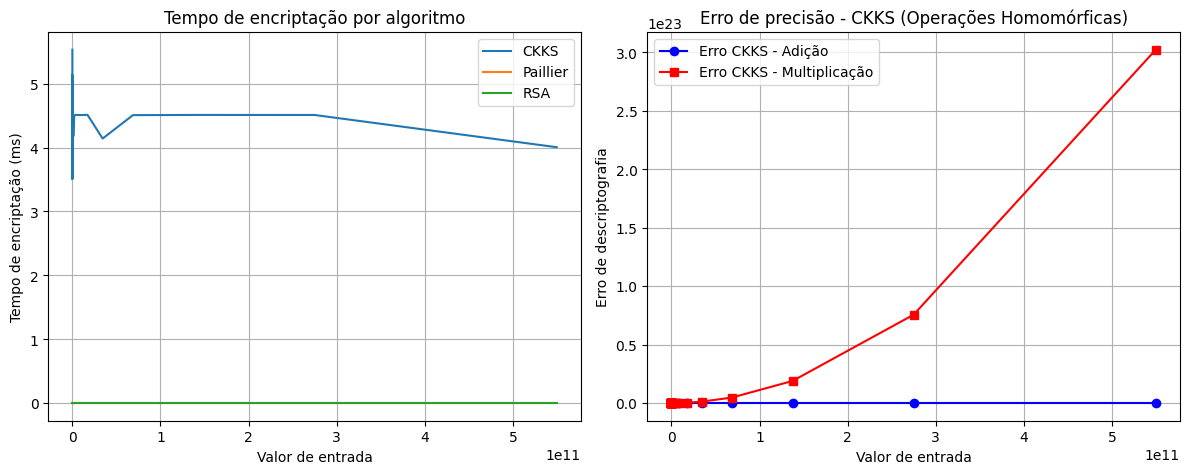

In [39]:
results = test_performance()
plot_results(results)